In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import random
from google.colab import drive 
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import nltk
import matplotlib.pyplot as plt
SEED = 0
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Download the data
#Replace these lines with paths to the data for the competition which can be found here: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data
DRIVE_FOLDER = '/content/drive/My Drive/kaggle_nlp/data/'
train = pd.read_csv(DRIVE_FOLDER + 'train.csv')
test = pd.read_csv(DRIVE_FOLDER + 'test.csv')
test_labels = pd.read_csv(DRIVE_FOLDER + 'test_labels.csv')

entries = [entry for entry in os.listdir(DRIVE_FOLDER) if os.path.isfile(os.path.join(DRIVE_FOLDER, entry))]
print(entries)
train.columns


['train.csv', 'test.csv', 'sample_submission.csv', 'test_labels.csv', 'submission.csv']


Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [4]:
#Prep train and test data
df_train = train.copy()

df_test = pd.merge(test, test_labels, on='id' )

Text(0.5, 1.0, 'String length distribution')

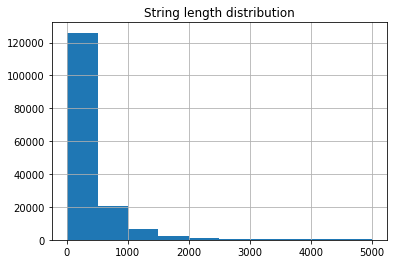

In [5]:
# Comment length distribution
df_train['comment_text'].str.len().hist()
plt.title('String length distribution')

In [6]:
#Check any nulls
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
# Identify the number of toxic rows


df_train['total'] = df_train.iloc[:,2:].sum(axis=1)

toxic_rows = df_train[df_train['total'] > 0]
print('The number of toxic rows is: ', f'{len(toxic_rows):,}')


The number of toxic rows is:  16,225


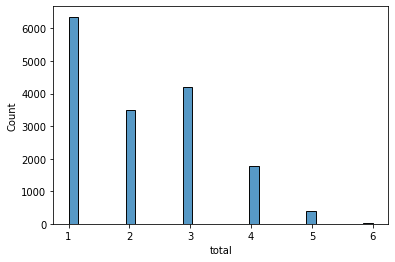

In [8]:
# Distribution of toxic rows
sns.histplot(data=toxic_rows, x='total')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

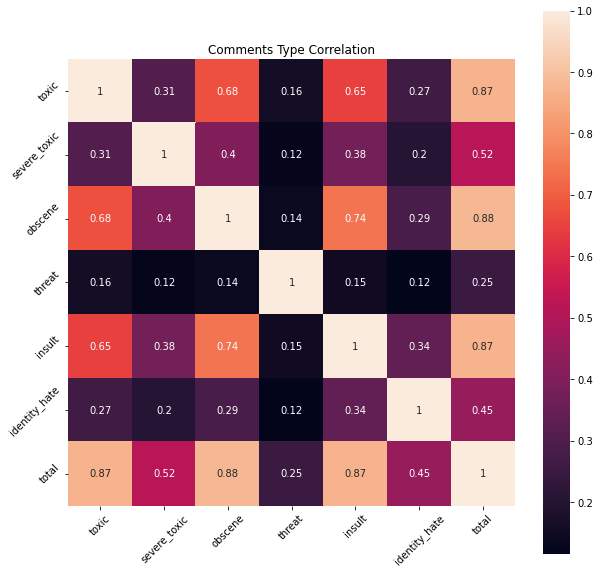

In [9]:
df_targets = df_train.iloc[:,2:]

df_corr = df_targets.corr()
plt.figure(figsize=[10,10])
sns.heatmap(df_corr, square=True, annot=True, vmax=1.0)
plt.title('Comments Type Correlation')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)

In [10]:
#Number of each type of comment
targets_list = list(train.columns[2:])
count_dict = {}

for comment_type in targets_list:

    df_selection = df_targets[(df_targets[comment_type]==1)]
    count_dict[comment_type] = len(df_selection)

print('Number of each type of comment: ', count_dict)



Number of each type of comment:  {'toxic': 15294, 'severe_toxic': 1595, 'obscene': 8449, 'threat': 478, 'insult': 7877, 'identity_hate': 1405}


In [11]:
#For each type identify the number and percentage for other comment types
another_dict = {}
others = list(train.columns[2:])

for key in count_dict:

  
  for other in others:
    
    if other != key:
      another_dict[other] = {}
      another_dict[other]['value'] = df_selection[other].sum()
      another_dict[other]['percentage'] = (round(df_selection[other].sum()*100/count_dict[key],2))
    else:
      pass

  print("The total number of " + key +" comments is " + str(f'{count_dict[key]:,}') +', ' + '{:.1%}'.format(count_dict[key]/len(toxic_rows)) + ' of the total')
  print("The total number of other comments are " + str(another_dict))
  print( ' ')

The total number of toxic comments is 15,294, 94.3% of the total
The total number of other comments are {'severe_toxic': {'value': 313, 'percentage': 2.05}, 'obscene': {'value': 1032, 'percentage': 6.75}, 'threat': {'value': 98, 'percentage': 0.64}, 'insult': {'value': 1160, 'percentage': 7.58}, 'identity_hate': {'value': 1405, 'percentage': 9.19}}
 
The total number of severe_toxic comments is 1,595, 9.8% of the total
The total number of other comments are {'severe_toxic': {'value': 313, 'percentage': 2.05}, 'obscene': {'value': 1032, 'percentage': 64.7}, 'threat': {'value': 98, 'percentage': 6.14}, 'insult': {'value': 1160, 'percentage': 72.73}, 'identity_hate': {'value': 1405, 'percentage': 88.09}, 'toxic': {'value': 1302, 'percentage': 81.63}}
 
The total number of obscene comments is 8,449, 52.1% of the total
The total number of other comments are {'severe_toxic': {'value': 313, 'percentage': 3.7}, 'obscene': {'value': 1032, 'percentage': 64.7}, 'threat': {'value': 98, 'percentage

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

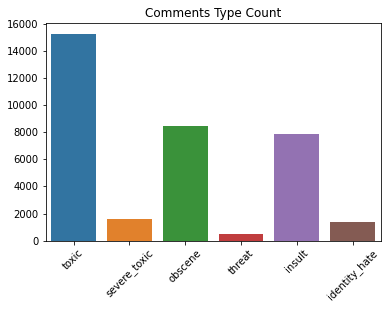

In [12]:
#Plot the number of toxic comments

sns.barplot(x = list(count_dict.keys()), y = list(count_dict.values()))
plt.title('Comments Type Count')

plt.xticks(rotation = 45)

In [13]:
#Print bad and clean comments

# Bad comments
#pd.options.display.max_colwidth=400
for t in targets_list:

  df_filter = df_train[df_train[t]==1]
  df_filter = df_filter.sample(n=10)

  print('Here are comments of type: ', t)

  print(df_filter['comment_text'])
  print(' ')

# Good comments

df_filter = df_train[df_train['total']==0]
df_filter = df_filter.sample(n=10)
print('Here are some good comments: ')
print(df_filter['comment_text'])
print(' ')


Here are comments of type:  toxic
4655        niggah \n\nhey fool whyd you delete my article?
12963     Vandalism \nYo broseph i vandalized user:fanof...
148975    Should we not just refer to them as Blacks? Af...
122018    The JPS... are you for real? This conversation...
96252     fuck fuck fuck fuck fuck fuck fuck fuck fuck f...
90034     Hello. \n\nYour talk page has been vandalized ...
91123                               I think you suck though
86663     Mentally Ill\nMongo are you one of the ill fan...
110123                               @Qwyrxian suck my dick
96176     I will tell it for final time\n\nListen up aho...
Name: comment_text, dtype: object
 
Here are comments of type:  severe_toxic
52394     You are a fucking dick pseudomonas \n\nyou do ...
2264      MOTHERFUCKER, DONT BE CHANGING THE FUCKING GTA...
18574     ______________________________________________...
140688    GO FIND A GIRLFRIEND \n\nI'LL GIVE U VANDALISM...
125267    your a dickhead your a dickhead your a 

In [14]:
#Average length of good and bad comments

df_train['length'] = df_train['comment_text'].apply(lambda x: len(x))
print('The average length of a good comment is ', round(np.mean(df_train[df_train['total'] == 0].length)))
print('The average length of a bad comment is ', round(np.mean(df_train[df_train['total'] > 0].length)))

The average length of a good comment is  404
The average length of a bad comment is  303


In [15]:
#Median of good and bad comments

df_train['length'] = df_train['comment_text'].apply(lambda x: len(x))
print('The median of a good comment is ', round(np.median(df_train[df_train['total'] == 0].length)))
print('The median of a bad comment is ', round(np.median(df_train[df_train['total'] > 0].length)))

The median of a good comment is  216
The median of a bad comment is  128


In [16]:
#Average number of words in good and bad comments
def num_words(s):
    s = s.split(' ')
    count = [i for i in s if i.isalpha()]
 
    return len(count)

df_train['num_words'] = df_train['comment_text'].apply(lambda x: num_words(x))


print("Average number of words in good comments: ", round(np.median(df_train[df_train['total'] == 0].num_words)))
print("Average number of words in bad comments: ", round(np.median(df_train[df_train['total'] > 0].num_words)))

Average number of words in good comments:  30
Average number of words in bad comments:  18


In [17]:
#Average word length in good and bad comments
def word_length(s):
    s = s.split(' ')
    l = [len(i) for i in s if i.isalpha()]
    if len(l) > 0:
      a = np.mean(l)
    else:
      a = 0

    return a

df_train['word_length'] = df_train['comment_text'].apply(lambda x: word_length(x))


print("Average length of a word in good comments: ", round(np.median(df_train[df_train['total'] == 0].word_length),2))
print("Average length of a word in bad comments: ", round(np.median(df_train[df_train['total'] > 0].word_length),2))


Average length of a word in good comments:  4.3
Average length of a word in bad comments:  4.02


In [18]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from nltk.corpus import stopwords
import string
from keras.preprocessing.sequence import pad_sequences

In [19]:

word_limit = 10000
my_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=word_limit, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)

In [20]:
#sample word counts
my_tokenizer.fit_on_texts(df_train.iloc[0:100,1])
print("The count of words",my_tokenizer.word_counts)

The count of words OrderedDict([('explanation', 5), ('why', 14), ('the', 333), ('edits', 11), ('made', 9), ('under', 9), ('my', 28), ('username', 3), ('hardcore', 1), ('metallica', 1), ('fan', 1), ('were', 9), ('reverted', 5), ('they', 12), ("weren't", 1), ('vandalisms', 1), ('just', 14), ('closure', 1), ('on', 67), ('some', 16), ('gas', 1), ('after', 6), ('i', 105), ('voted', 1), ('at', 34), ('new', 2), ('york', 1), ('dolls', 1), ('fac', 1), ('and', 106), ('please', 21), ("don't", 31), ('remove', 4), ('template', 3), ('from', 29), ('talk', 33), ('page', 35), ('since', 7), ("i'm", 25), ('retired', 1), ('now', 10), ('89', 1), ('205', 1), ('38', 1), ('27', 1), ("d'aww", 1), ('he', 20), ('matches', 2), ('this', 64), ('background', 1), ('colour', 1), ('seemingly', 1), ('stuck', 2), ('with', 54), ('thanks', 14), ('21', 1), ('51', 1), ('january', 1), ('11', 1), ('2016', 1), ('utc', 6), ('hey', 4), ('man', 5), ('really', 7), ('not', 62), ('trying', 8), ('to', 185), ('edit', 16), ('war', 1), (

In [21]:
#A sample word sequence
my_tokenizer.fit_on_texts(df_train['comment_text'])
df_train['word_sequence'] = my_tokenizer.texts_to_sequences(df_train['comment_text'].str.lower())
r = np.random.randint(0, high=df_train.shape[0])
print('A random sequence ', df_train.loc[r, 'word_sequence'])

A random sequence  [170, 1582, 8, 1, 1617, 2604, 1793, 6517, 1075, 148, 171, 1582, 8, 1768, 10, 1075, 12]


In [22]:
#max length of the sequence
max_len = df_train['word_sequence'].map(lambda x: len(x)).max()
print('The longest sequence in all comments is ', max_len)


The longest sequence in all comments is  1400


In [23]:
df_train['sequence_length'] = df_train['word_sequence'].map(lambda x: len(x))

for i in [10,50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400, 500,1000,1200,1300]:
  current = df_train[df_train['sequence_length'] > i]
  print('%.2f%% of comments have more than %d words.' %(len(current)*100/len(df_train),i))

84.10% of comments have more than 10 words.
35.86% of comments have more than 50 words.
23.36% of comments have more than 75 words.
16.46% of comments have more than 100 words.
12.13% of comments have more than 125 words.
9.36% of comments have more than 150 words.
7.29% of comments have more than 175 words.
5.81% of comments have more than 200 words.
3.93% of comments have more than 250 words.
2.76% of comments have more than 300 words.
2.15% of comments have more than 350 words.
1.72% of comments have more than 400 words.
1.17% of comments have more than 500 words.
0.02% of comments have more than 1000 words.
0.01% of comments have more than 1200 words.
0.00% of comments have more than 1300 words.


In [24]:
import operator

nltk.download('stopwords')
stopWords = set(stopwords.words('english'))
n_words=50
def remove_stopwords(word_count):
  #word_count1 = sorted(word_count.items(),key=operator.itemgetter(1),reverse=True)

  new_dict = {}
  for k, v in word_count.items():
    if k not in stopWords:
      new_dict[k] = v
  sorted_dict = sorted(new_dict.items(),key=operator.itemgetter(1),reverse=True)[:n_words]

  return sorted_dict


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
#Visualize the comments 

good_tokenizer =  tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
good_tokenizer.fit_on_texts(df_train[df_train['total']==0]['comment_text'])
word_count1 = good_tokenizer.word_counts

r1 = remove_stopwords(word_count1)
print('Good Comments: ', r1)


Good Comments:  [('article', 54479), ('page', 43892), ('wikipedia', 41994), ('talk', 34804), ('please', 28737), ('would', 28090), ('one', 27115), ('like', 24189), ('see', 20523), ('also', 19792), ('think', 18679), ('edit', 17204), ('know', 16745), ("i'm", 16222), ('articles', 16193), ('use', 16176), ('people', 15885), ('may', 15257), ('time', 14642), ('thanks', 13457), ('user', 12823), ('even', 12303), ('make', 11934), ('good', 11912), ('well', 11604), ('information', 11584), ('could', 11500), ('deletion', 11381), ('sources', 11083), ('get', 10943), ('name', 10689), ('wp', 10586), ('way', 10506), ('first', 10482), ('help', 10458), ('want', 10304), ('image', 10303), ('new', 10230), ('pages', 10228), ('source', 10104), ('section', 9935), ('editing', 9770), ('thank', 9709), ('need', 9501), ('say', 9302), ('edits', 9211), ('made', 9177), ('many', 9057), ('used', 8941), ('much', 8906)]


Text(0.5, 1.0, 'Good Comments')

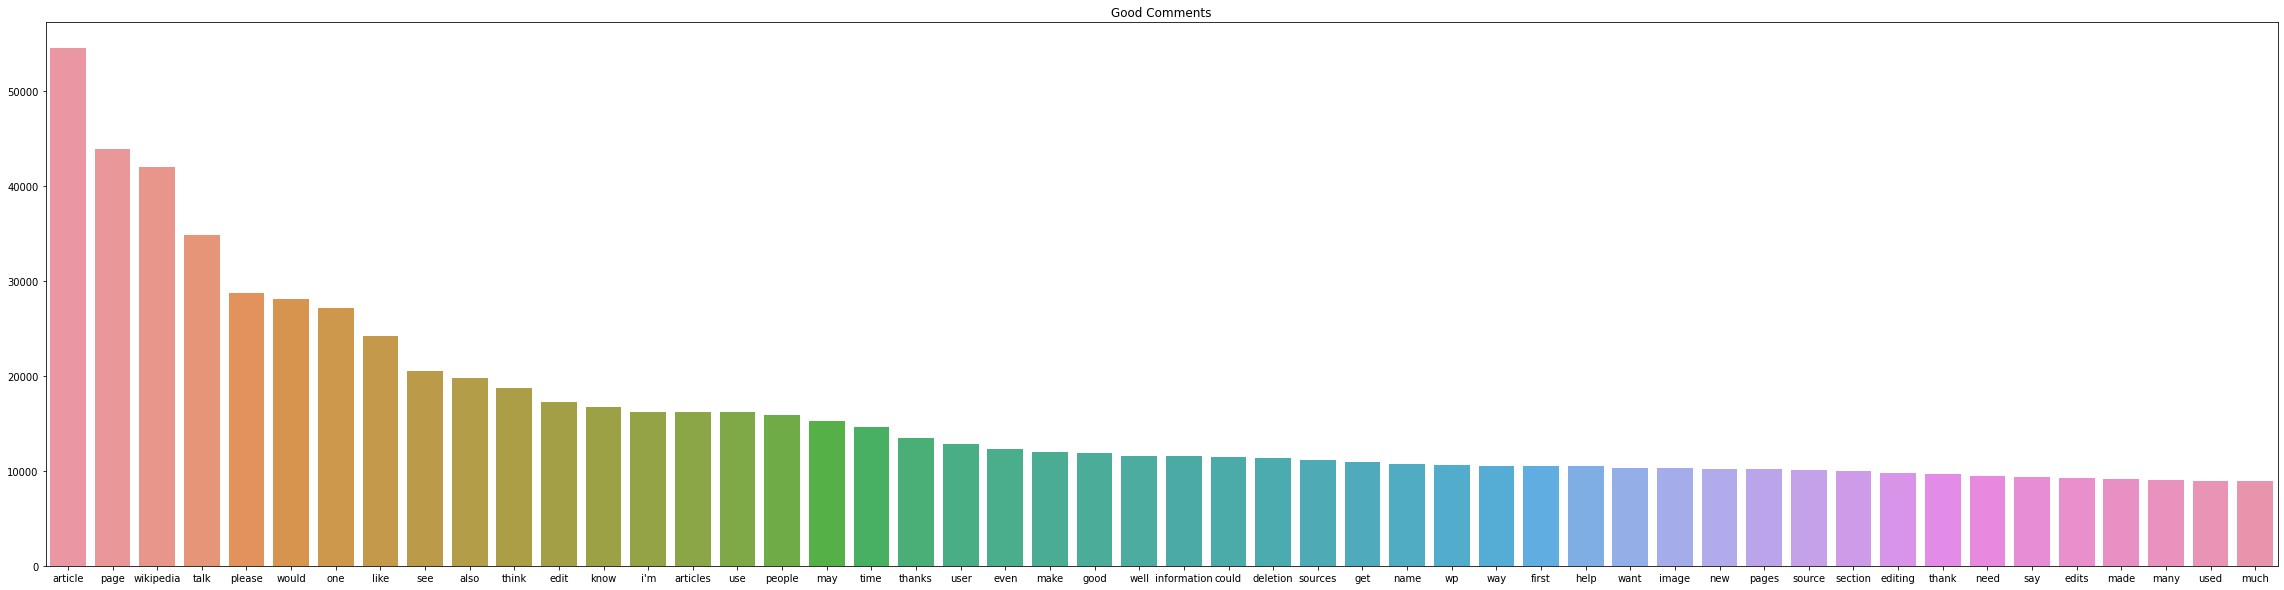

In [26]:
#Plot the comment word count
plt.figure(figsize=[40,10])
x_val = [x[0] for x in r1]
y_val = [x[1] for x in r1]
sns.barplot(x=x_val, y=y_val)
plt.title('Good Comments')

Toxic Comments for type: toxic [('fuck', 9597), ('shit', 3618), ('wikipedia', 3599), ('like', 3510), ('nigger', 3298), ('fucking', 3287), ('suck', 3235), ('ass', 2940), ('go', 2864), ('u', 2734), ('hate', 2630), ('get', 2300), ('gay', 2236), ('know', 2195), ('page', 2144), ('die', 2082), ('faggot', 2016), ('fat', 1970), ('moron', 1860), ('people', 1803), ('bitch', 1784), ('hi', 1691), ('cunt', 1538), ('one', 1515), ("i'm", 1500), ('talk', 1469), ('sucks', 1443), ('stupid', 1436), ('wiki', 1423), ('stop', 1420), ('article', 1384), ('pig', 1353), ('jew', 1348), ('user', 1344), ('dick', 1303), ('penis', 1238), ('think', 1232), ('want', 1220), ('bullshit', 1138), ('block', 1087), ('life', 1085), ('time', 1063), ('asshole', 1040), ('wanker', 1033), ('right', 1030), ('dont', 1024), ('would', 1013), ('fag', 1011), ('even', 1007), ('bark', 1001)]
Toxic Comments for type: severe_toxic [('fuck', 6984), ('suck', 2535), ('ass', 2114), ('shit', 1883), ('faggot', 1570), ('u', 1482), ('fucking', 1456

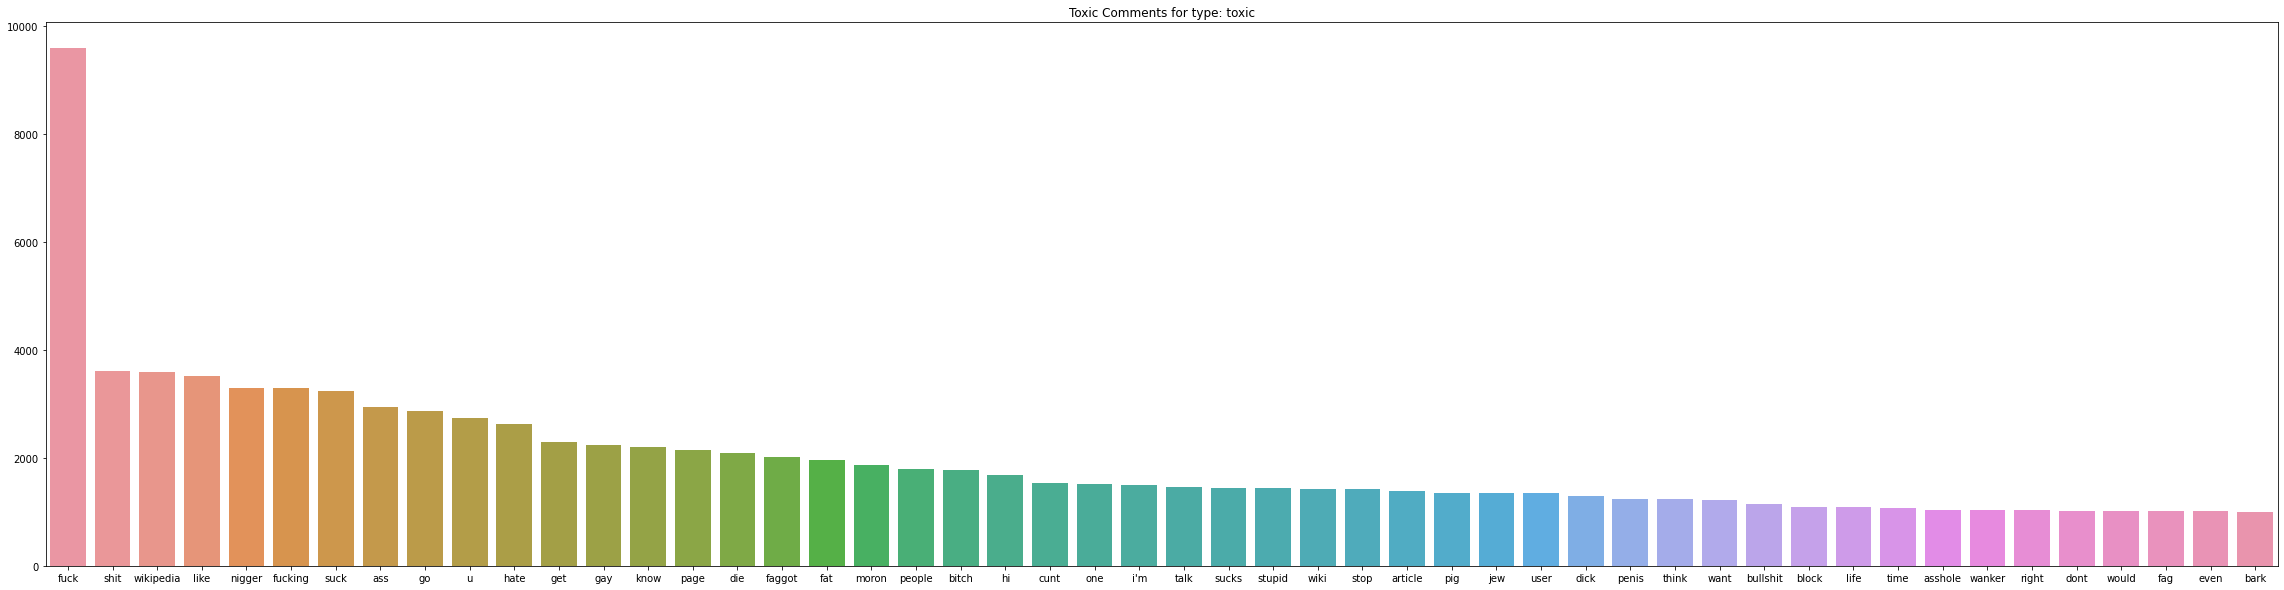

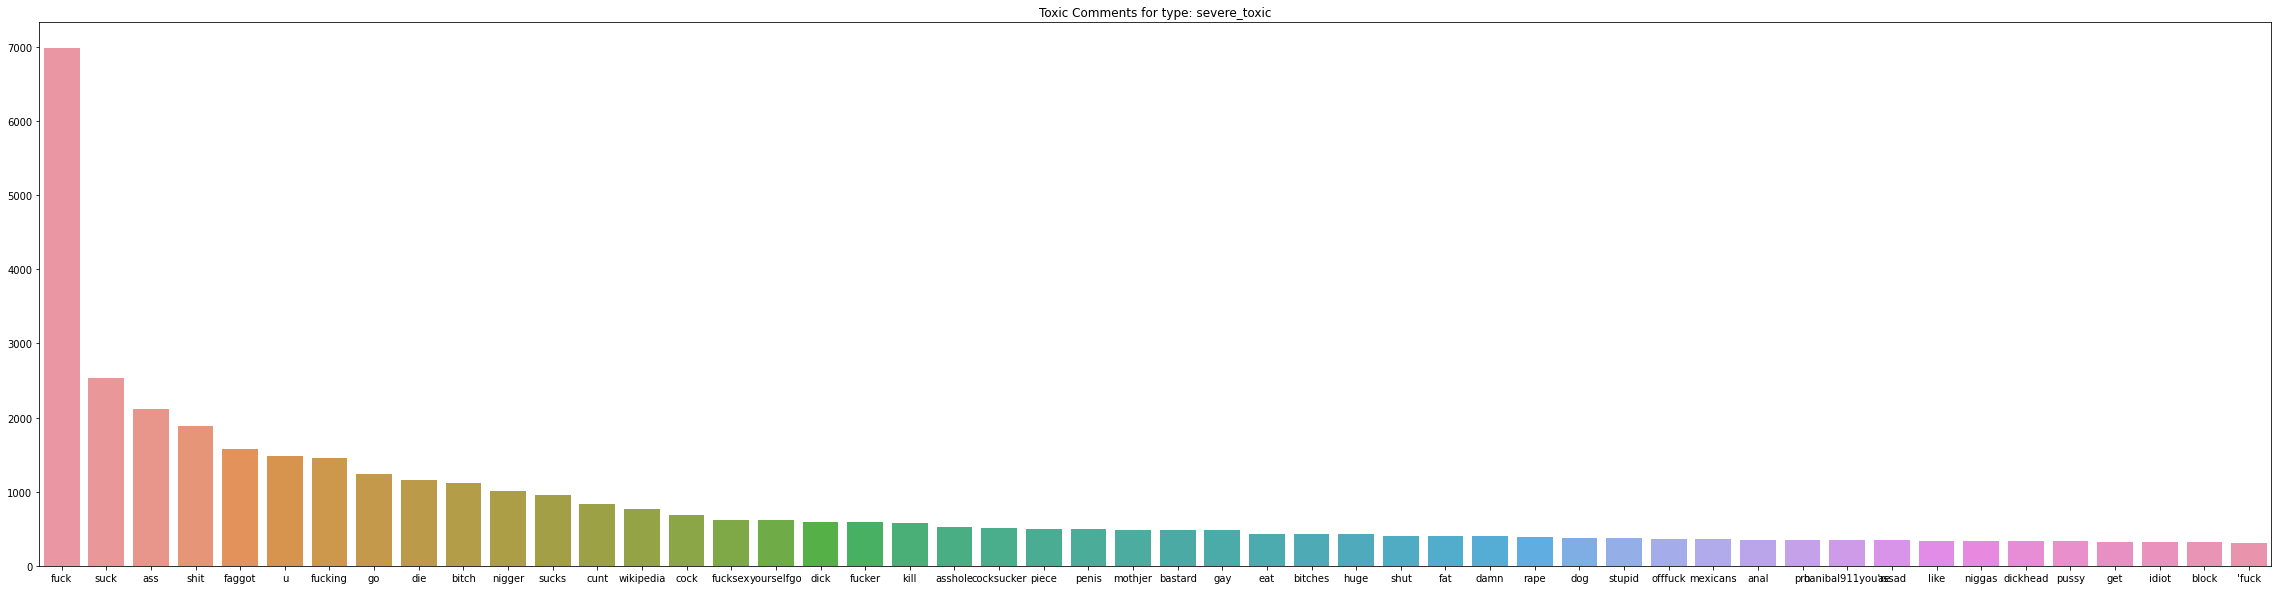

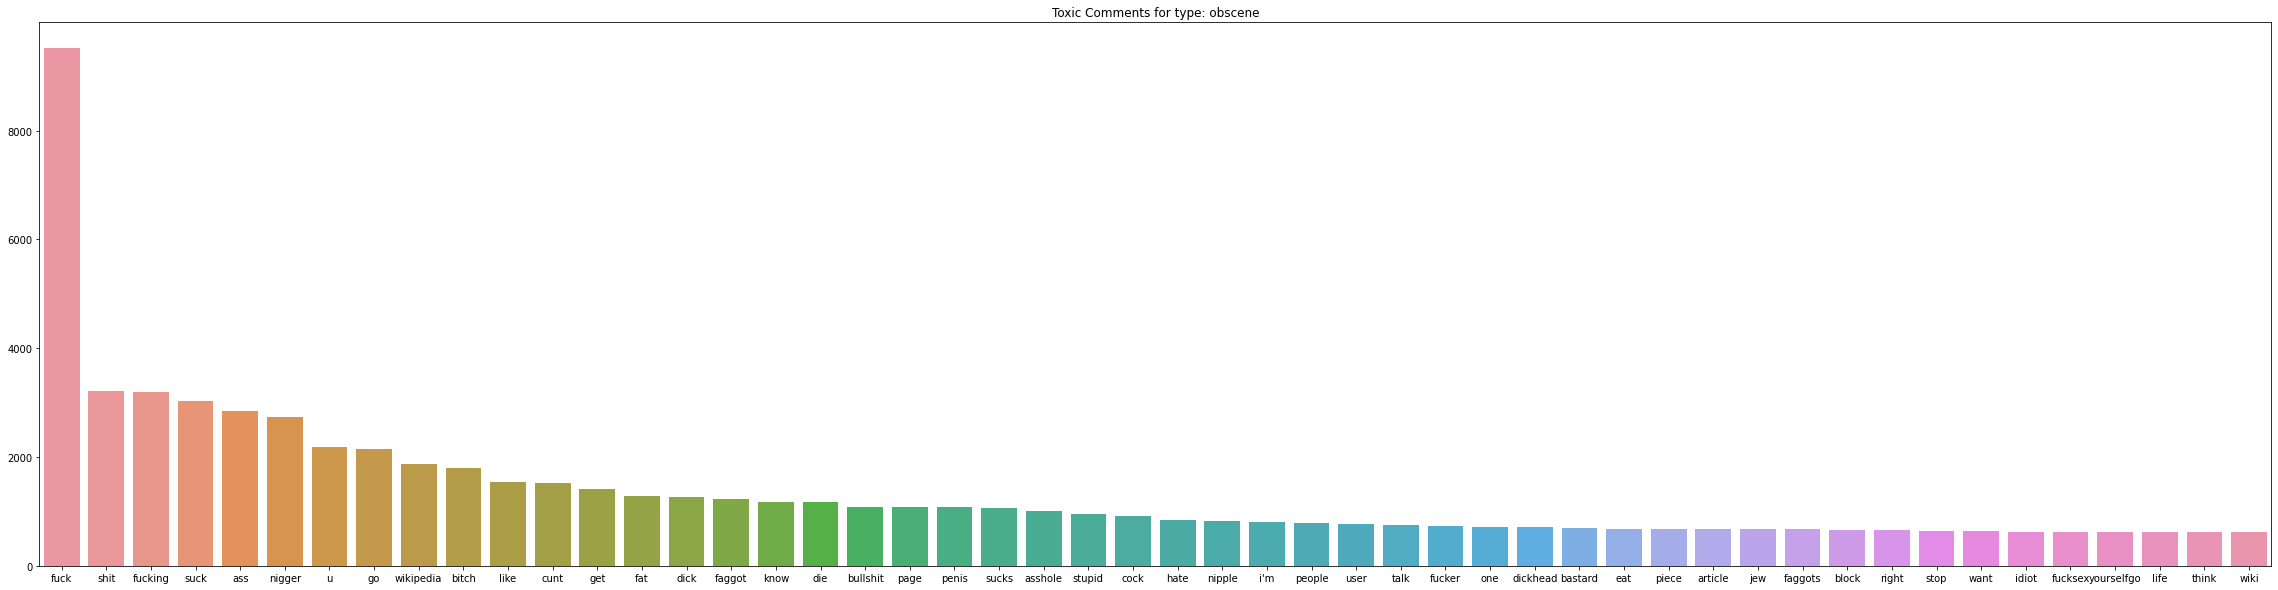

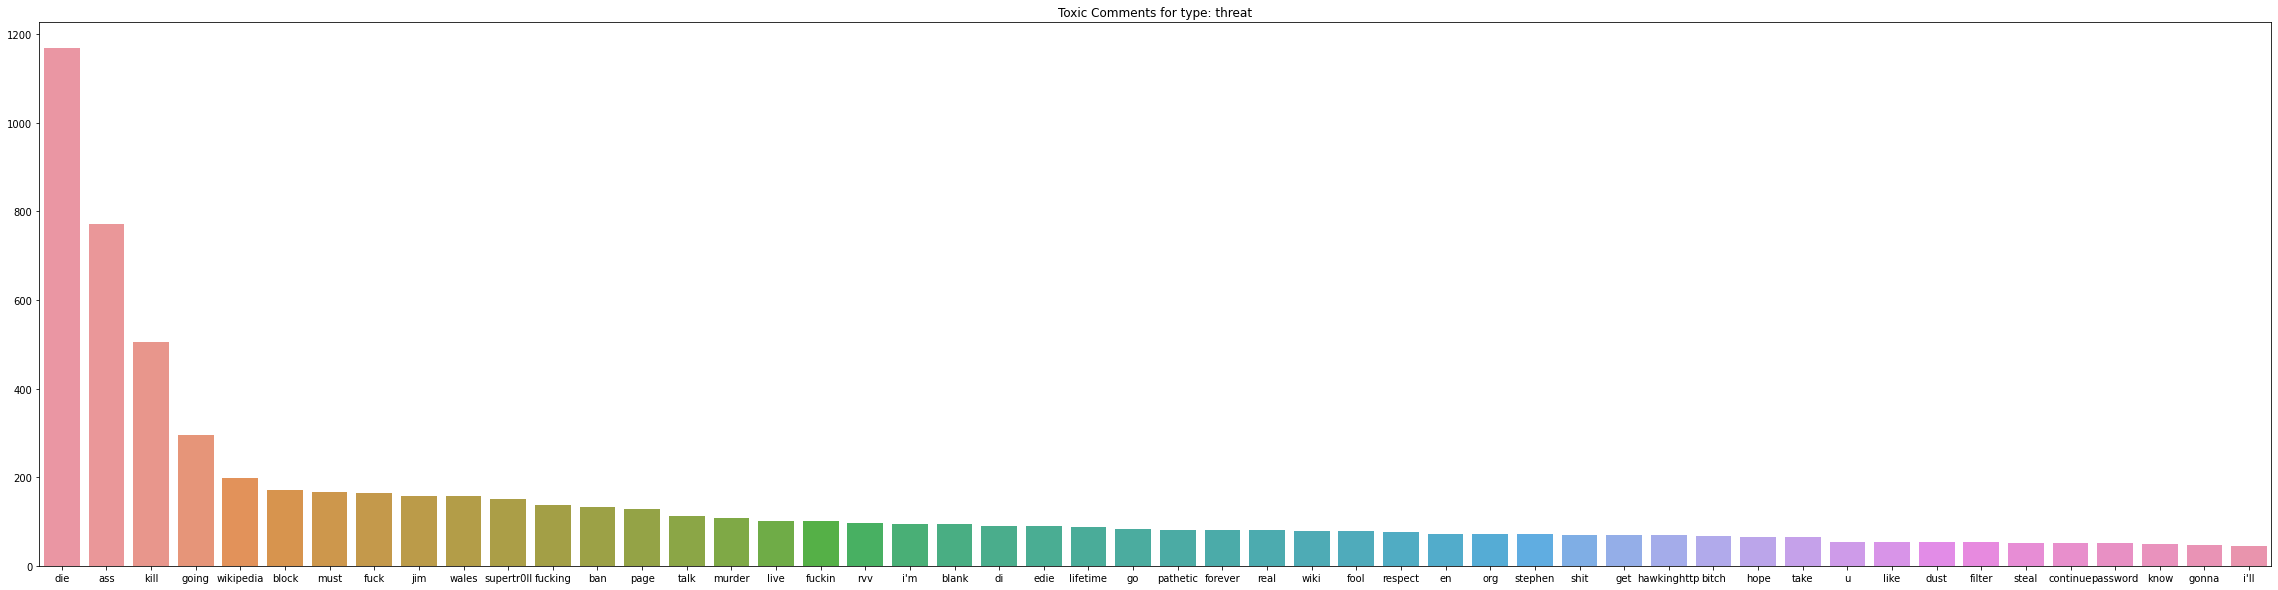

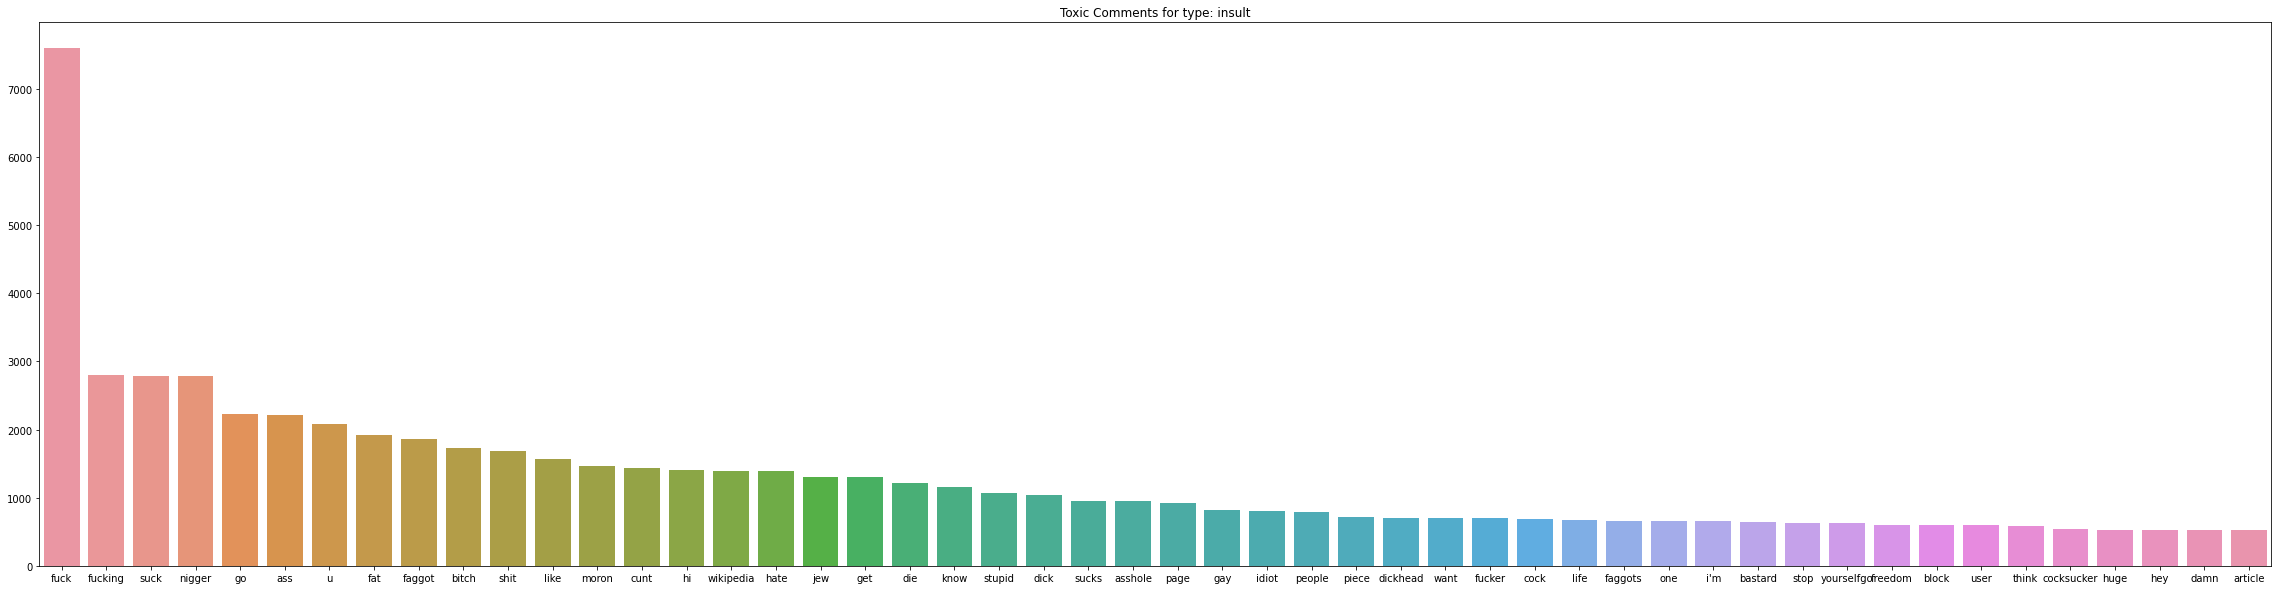

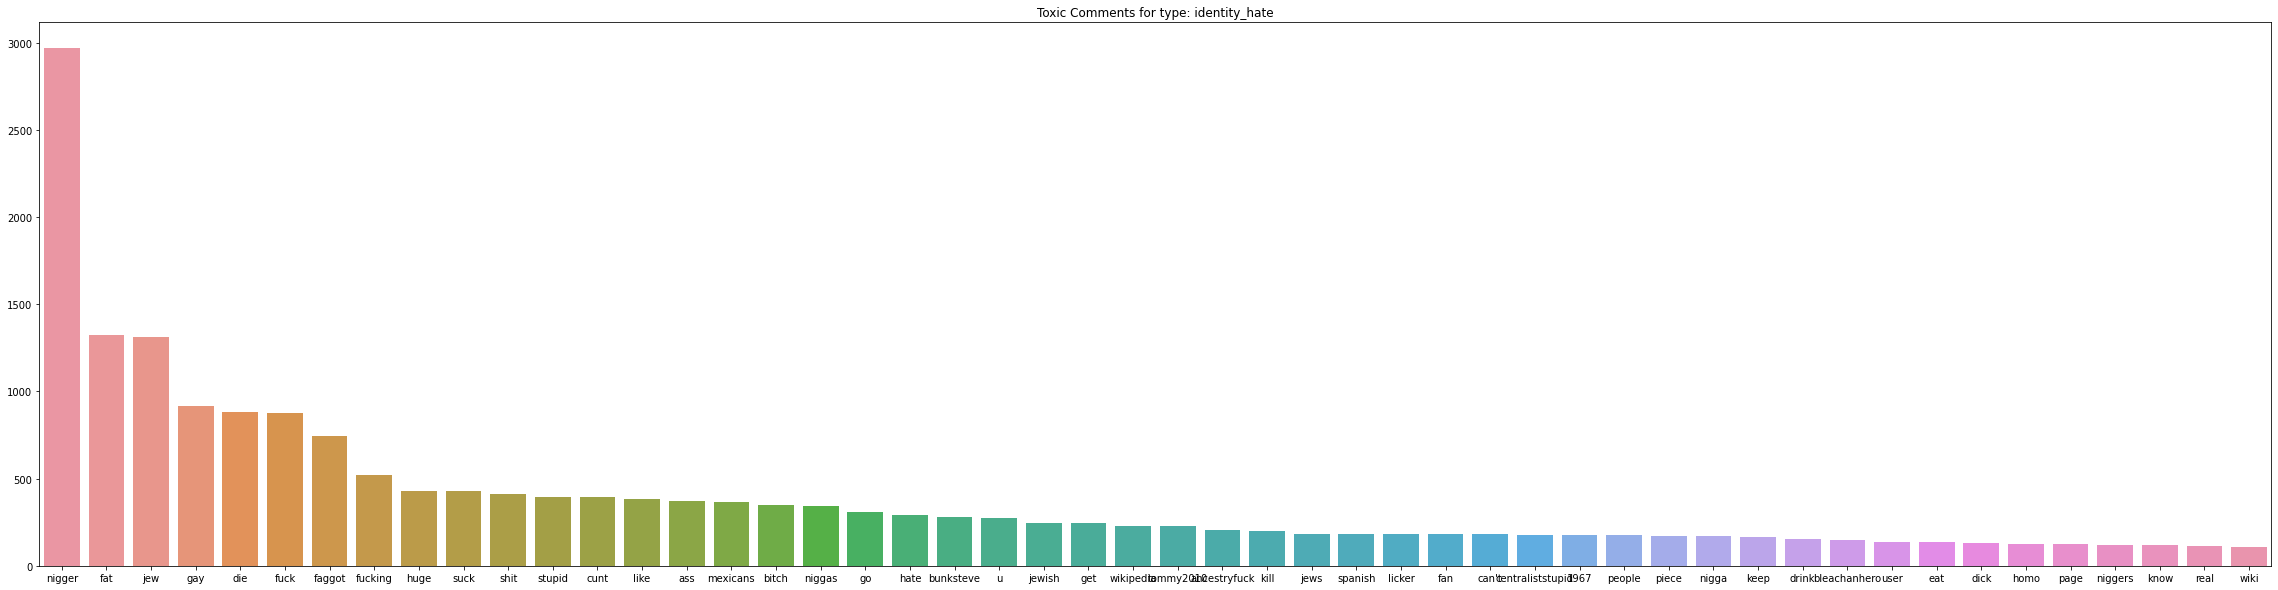

In [27]:

for label in targets_list:
  toxic_tokenizer =  tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)

  toxic_tokenizer.fit_on_texts(df_train[df_train[label]==1]['comment_text'])
  word_count2 = toxic_tokenizer.word_counts
  r2 = remove_stopwords(word_count2)
  print('Toxic Comments for type: '+label, r2)
  
  x_val = [x[0] for x in r2]
  y_val = [x[1] for x in r2]
  plt.figure(figsize=[40,10])
  sns.barplot(x=x_val, y=y_val)
  plt.title('Toxic Comments for type: ' +label)



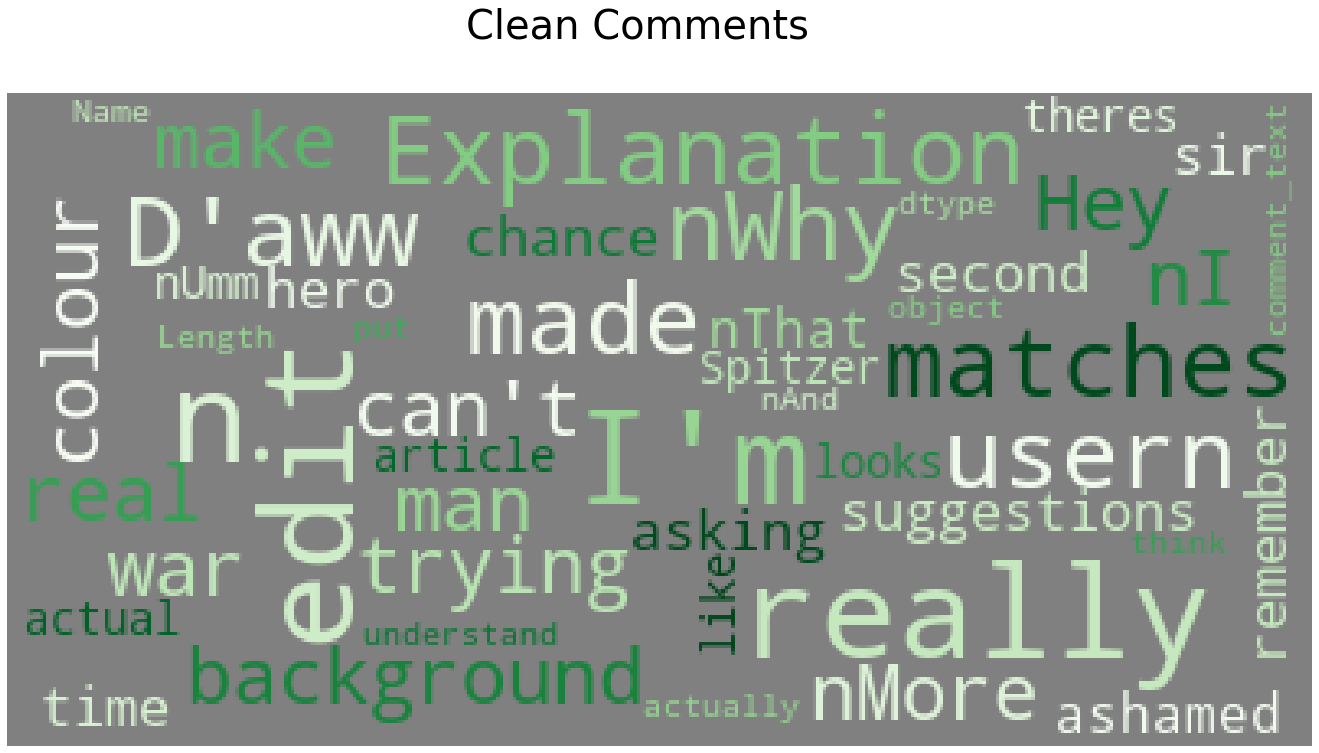

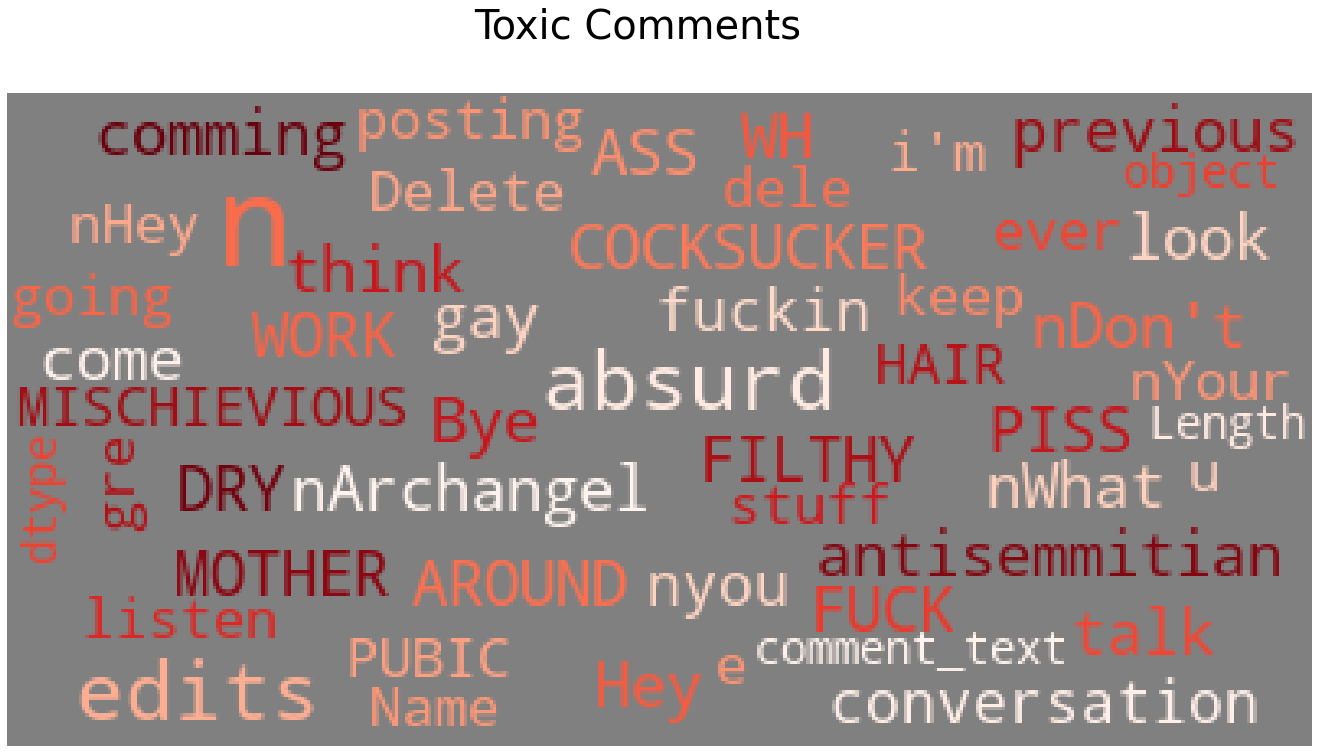

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='grey',
                      stopwords=set(stopwords.words('english')),
                      max_words=100,
                      max_font_size=40,
                      colormap='Greens'
                         ).generate(str(df_train[df_train['total']==0]['comment_text']))
plt.figure('wordcloud', figsize=(24,12))
plt.suptitle('Clean Comments', fontsize=40)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

wordcloud = WordCloud(background_color='grey',
                      stopwords=set(stopwords.words('english')),
                      max_words=100,
                      max_font_size=40,
                      colormap='Reds'
                         ).generate(str(df_train[df_train['total'] > 0]['comment_text']))
plt.figure('toxic_wordcloud', figsize=(24,12))
plt.suptitle('Toxic Comments', fontsize=40)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
